In this tutorial, we learn how to rotate protein structures (representated as `StructureBatch`) using rotation matrices.

In [2]:
import matplotlib.pyplot as plt
import protstruc as ps
import matplotlib.animation as animation
import numpy as np
import torch

pdb_id = '1REX'

sb = ps.StructureBatch.from_pdb_id(pdb_id)
# center the structure at the origin
sb.center_at()

translations = sb.backbone_translations()
translations.shape

torch.Size([1, 130, 3])

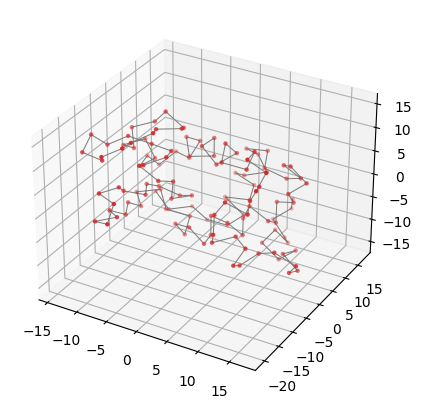

In [10]:
fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot(111, projection='3d')

chain_idx = sb.get_chain_idx()[0]
num_chains = int(chain_idx.max().item() + 1)

sb.center_at()

for i in range(num_chains):
    mask = chain_idx == i
    # Plot the original structure
    ax.plot(
        translations[0, mask, 0].numpy(),
        translations[0, mask, 1].numpy(),
        translations[0, mask, 2].numpy(),
        c='C7',
        lw=0.75,
    )
    ax.scatter(
        translations[0, mask, 0].numpy(),
        translations[0, mask, 1].numpy(),
        translations[0, mask, 2].numpy(),
        c='C3',
        s=10,
        ec='none',
    )



In [11]:

from scipy.spatial.transform import Rotation as R

fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot(111, projection='3d')

# define an axis-angle rotation of 2*pi/100 around the z-axis
rot = R.from_rotvec(np.array([0, 0, 1]) * 2 * np.pi / 100)
rotmat = torch.tensor(rot.as_matrix()).float()

ims = []
for _ in range(100):
    # here we rotate the structure by `rotmat` defined above
    sb.rotate(rotmat)
    translations = sb.backbone_translations()

    tmp = []
    for i in range(num_chains):
        mask = chain_idx == i

        im1, = ax.plot(
            translations[0, mask, 0].numpy(),
            translations[0, mask, 1].numpy(),
            translations[0, mask, 2].numpy(),
            c=f'C7',
            lw=0.75,
        )
        im2 = ax.scatter(
            translations[0, mask, 0].numpy(),
            translations[0, mask, 1].numpy(),
            translations[0, mask, 2].numpy(),
            c='C3',
            s=10,
            ec='none',
        )
        tmp.append(im1)
        tmp.append(im2)

    ims.append(tmp)

ani = animation.ArtistAnimation(fig, ims, interval=100, blit=True, repeat_delay=1000)
ani.save(f'animations/{pdb_id}_rotation.gif')

plt.clf();

MovieWriter ffmpeg unavailable; using Pillow instead.


<Figure size 500x500 with 0 Axes>

![tmp](/tutorials/animations/1REX_rotation.gif)